<a href="https://colab.research.google.com/github/gaurav0910/gaurav0910/blob/main/Co-vid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 DATA ANALYSIS:**

---



---

**INTRODUCTION:**

We are all familiar by this name and how it have impacted the whole world.

Coronavirus Disease(Covdi-19) is a **contagious disease** caused by **severe acute respiratory syndrome coronavirus 2**(SARS-CoV-2). The first known case was identified in Wuhan,China in December 2019. This disease has since spread worldwide, leading to an **onoging pandemic**.

---
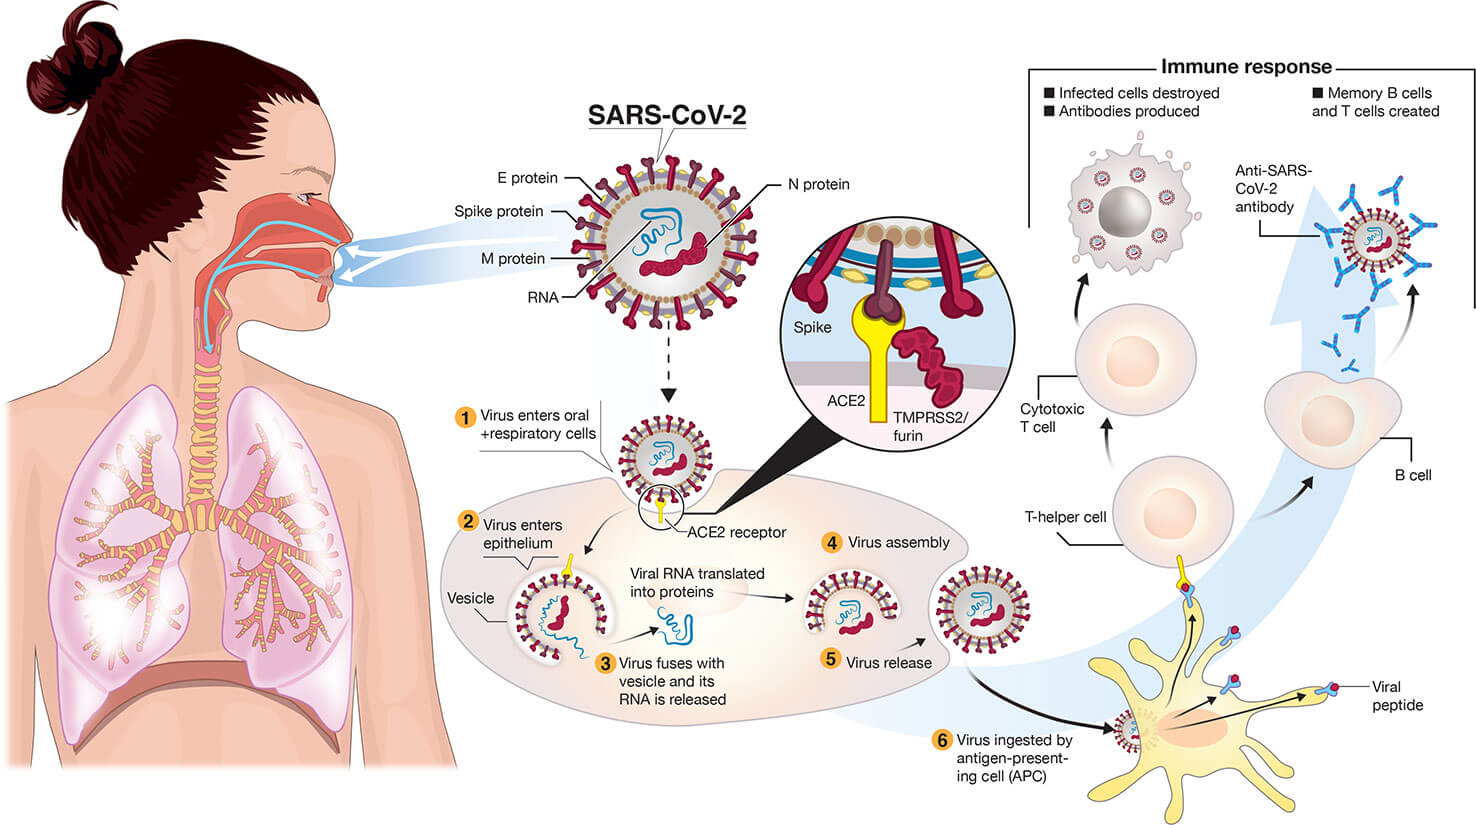

* The dataset for analysis is taken from Kaggle. The dataset taken is not recently updated. Two datset are combined in this one is about the Co-vid India the other is about Co-vid Vaccination. 

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving covid_19_india.csv to covid_19_india.csv


In [ ]:
covid_df = pd.read_csv(io.BytesIO(uploaded['covid_19_india.csv']))
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
covid_df.shape

(18110, 9)

In [ ]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [ ]:
uploaded = files.upload()

Saving covid_vaccine_statewise.csv to covid_vaccine_statewise.csv


In [ ]:
vaccine_df = pd.read_csv(io.BytesIO(uploaded['covid_vaccine_statewise.csv']))
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
covid_df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace=True, axis=1)

In [ ]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')

In [ ]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
# Total number of active cases statewise

covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Deaths'] + covid_df['Cured'])
covid_df.tail(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_Cases
18100,18101,2021-08-11,8:00 AM,Puducherry,-,-,119115,1800,121766,851
18101,18102,2021-08-11,8:00 AM,Punjab,-,-,582791,16322,599573,460
18102,18103,2021-08-11,8:00 AM,Rajasthan,-,-,944700,8954,953851,197
18103,18104,2021-08-11,8:00 AM,Sikkim,-,-,25095,356,28018,2567
18104,18105,2021-08-11,8:00 AM,Tamil Nadu,-,-,2524400,34367,2579130,20363
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,8112
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,2076
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,444
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,545
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,10215


Now you can see **Active Cases** column is added in the table.

Now we will use the Pivot table for Confirmed, Cured & Deaths Cases with the use of pandas dataframe.

In [ ]:
statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Cured", "Deaths"], index="State/UnionTerritory", aggfunc=max)

Now, we will calculate the recovery rate.

In [ ]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

Now, we will calculate the Mortality rate.

In [ ]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

We will sort values by "Confirmed Cases."

In [ ]:
statewise = statewise.sort_values(by="Confirmed", ascending=False)
statewise.style.background_gradient(cmap='cubehelix')

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


As we can see from the pivot table that the most **Confirmed Cases** are from **Maharashtra** followed by **Kerla, Karnatka** and so on.
The **Mortality Rate**  is also high in Maharastra region. But the highest **Mortality rate** is in **Punjab**.

# #Top 10 states based on the number of Active cases:

In [ ]:
top_10_active_cases = covid_df.groupby(by="State/UnionTerritory").max()[["Active_Cases", "Date"]].sort_values(by=["Active_Cases"], ascending = False).reset_index().head(10)

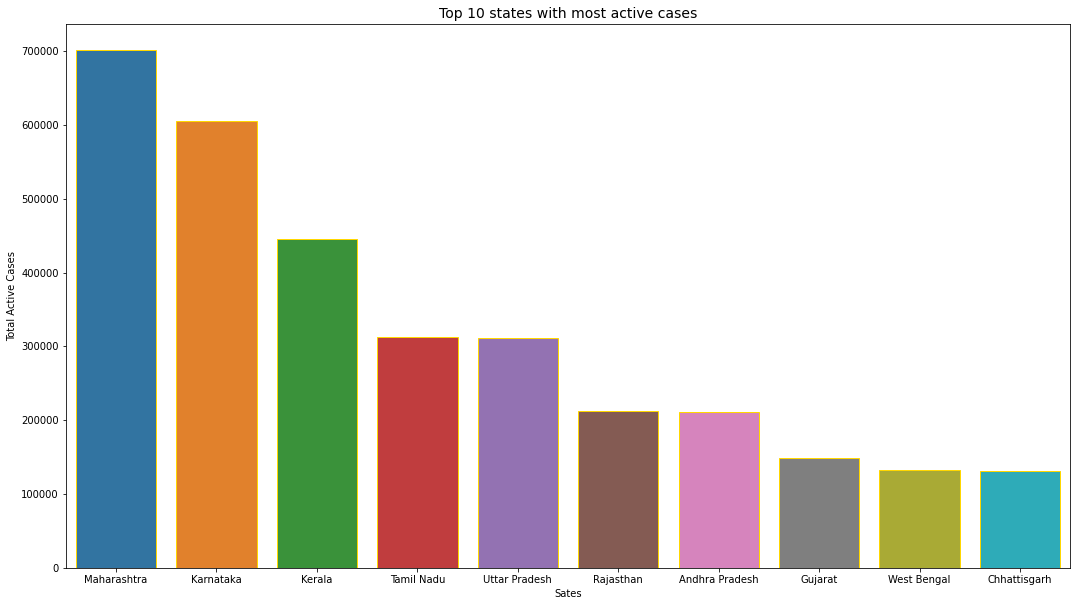

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.barplot(data=top_10_active_cases, x="State/UnionTerritory", y ="Active_Cases", edgecolor="gold")

plt.title("Top 10 states with most active cases", size=14)
plt.ylabel("Total Active Cases")
plt.xlabel("Sates")
plt.show()

# #Top 10 states with highest number of Death cases.

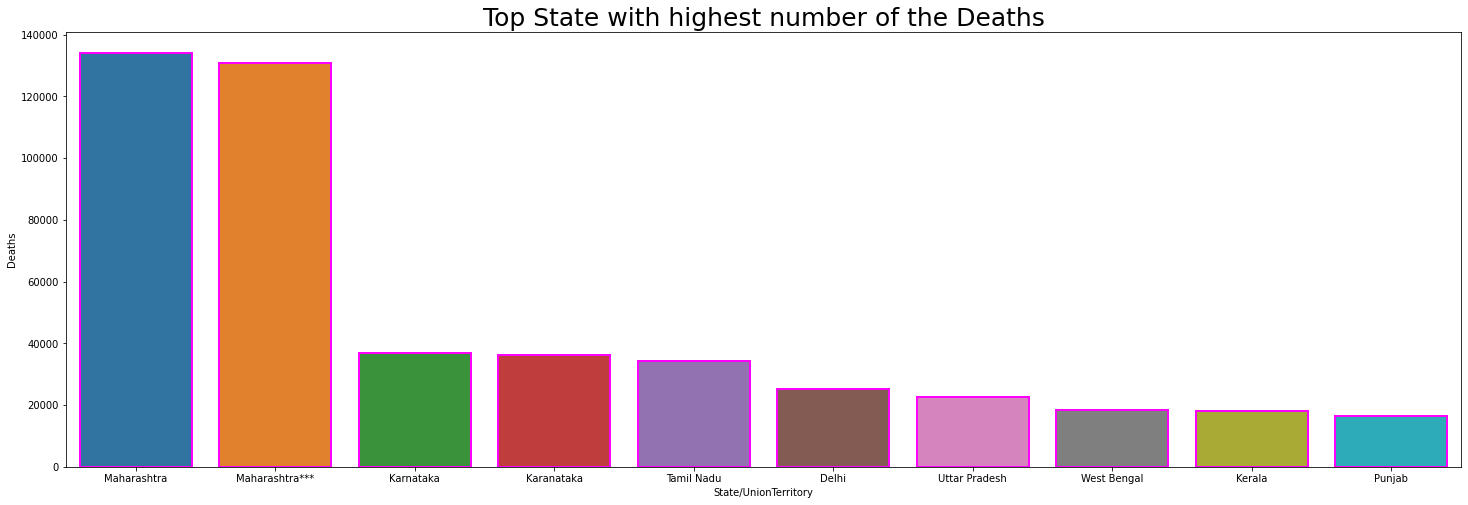

In [ ]:
top_10_death_cases = covid_df.groupby(by='State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by='Deaths', ascending=False).reset_index().head(10)

plt.figure(figsize=(25,8))
plt.title("Top State with highest number of the Deaths", size=25)
plt.ylabel("TOTAL DEATHS")
plt.xlabel("States")

ax = sns.barplot(data=top_10_death_cases, x="State/UnionTerritory", y="Deaths", linewidth=2, edgecolor="magenta")
plt.show()


## #Active case trends

Text(0.5, 1.0, 'Top 5 affected states in India')

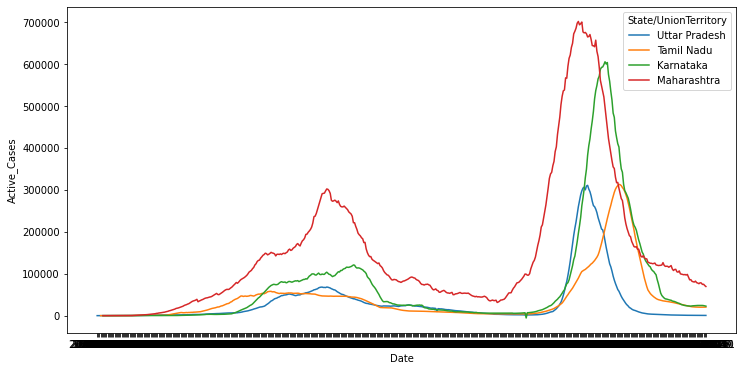

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerla', 'Tamil Nadu', 'Uttar Pradesh'])], x = 'Date', y='Active_Cases', hue='State/UnionTerritory')
ax.set_title("Top 5 affected states in India", size=16)

In [ ]:
vaccine_df.head() 

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
vaccine_df.rename(columns= {'Updated On' : 'Vaccine Date'}, inplace=True)
vaccine_df.head(10)

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [ ]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [ ]:
vaccine_df.isnull().sum()

Vaccine Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [ ]:
vaccination = vaccine_df.drop(columns=['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis=1)

In [ ]:
vaccination.head()

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


# Male & Female Vaccination:

In [ ]:
male = vaccination["Male(Individuals Vaccinated)"].sum()
female = vaccination["Female(Individuals Vaccinated)"].sum()
px.pie(names=["Male", "Female"], values=[male, female], title="Male and Female Vaccination")

In [ ]:
## Remove rows where state = India

vaccine = vaccine_df[vaccine_df.State!= 'India']
vaccine

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vaccine.rename(columns={"Total Individuals Vaccinated": "Total"}, inplace = True)
vaccine.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


# #Most Vaccinated State:


In [ ]:
max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total', ascending=False).head()
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


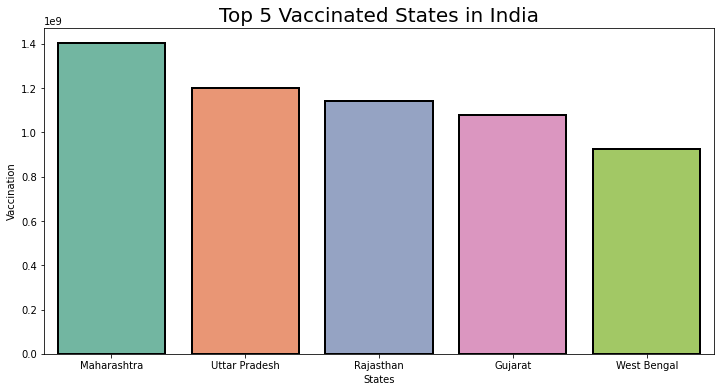

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Top 5 Vaccinated States in India", size = 20)
x = sns.barplot(data = max_vac.iloc[:10], y = max_vac.Total, x = max_vac.index, linewidth=2, edgecolor='black', palette = 'Set2')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()

# States with lowest number of vacciantion counts:

In [ ]:
min_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vac = min_vac.sort_values('Total').head()
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


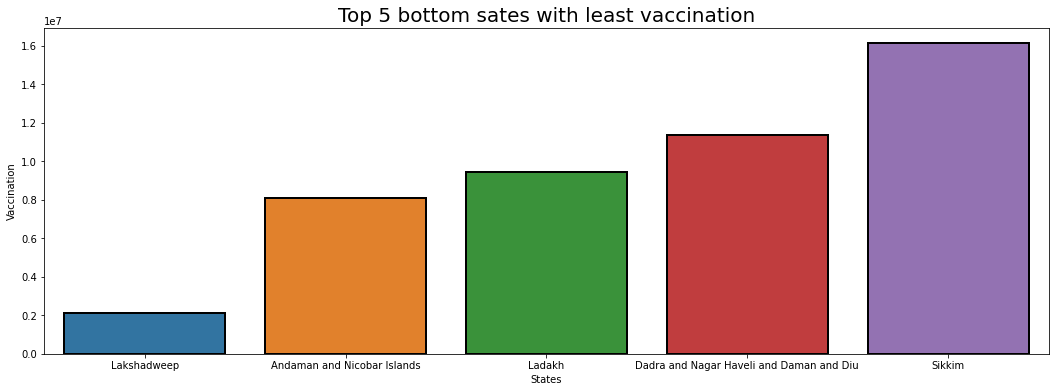

In [ ]:
plt.figure(figsize=(18,6))
plt.title("Top 5 bottom sates with least vaccination", size=20)
x = sns.barplot(data = min_vac.iloc[:10], y = min_vac.Total, x = min_vac.index,  linewidth=2, edgecolor='black')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()
